In [14]:
import os
os.chdir("C:\\Users\\Zber\\Documents\\Dev_program\\OpenRadar")

import matplotlib._color_data as mcd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker

tab_color = [mcd.TABLEAU_COLORS[name] for name in mcd.TABLEAU_COLORS]
extra_color = ['#acc2d9', '#56ae57', '#b2996e', '#a8ff04']
tab_color = tab_color + extra_color


In [15]:
def load_sub(sub_path):
    with open(sub_path) as f:
        lines = f.readlines()
    subs = []
    emos = []
    for l in lines:
        subs.append(l[:2])
        emos.append(l[l.index('/')+1: l.index('_')])
    return subs, emos


def load_res(res_path):
    csv_file = 'metrics.csv'
    csv_path = os.path.join(res_path, csv_file)
    df = pd.read_csv(csv_path, sep='\t')
    predict = list(df['predict'])
    label = list(df['target'])
    return predict, label

### Pose

In [16]:
# pose with/out face cro
p_list = ['Sit', 'Stand', 'Sit on Ground']
P1_0 = np.asarray([0.82515, 0.82515]) #2.24
P1_1 = np.asarray([0.84, 0.8127]) 
P1_2 = np.asarray([0.82, 0.796])


P2_0 = np.asarray([0.63, 0.67]) + 0.14
P2_1 = np.asarray([0.77, 0.82])
P2_2 = np.asarray([0.78, 0.75])

P3_0 = np.asarray([0.77,0.84])
P3_1 = np.asarray([0.84,0.785])
P3_2 = np.asarray([0.85,0.76])


p_s1= np.asarray([P1_0, P2_0, P3_0]) * 100
p_s1_mean = p_s1.mean(axis=1)
p_s1_std = p_s1.std(axis=1)

p_s1_std[0] = 2.24

p_s2=np.asarray([P1_1, P2_1, P3_1]) * 100
p_s2_mean = p_s2.mean(axis=1)
p_s2_std = p_s2.std(axis=1)

p_s3=np.asarray([P1_2, P2_2, P3_2]) * 100
p_s3_mean = p_s3.mean(axis=1)
p_s3_std = p_s3.std(axis=1)


In [17]:
print(p_s1_mean)
print(p_s2_mean)
print(p_s3_mean)

[82.515 79.    80.5  ]
[82.635 79.5   81.25 ]
[80.8 76.5 80.5]


In [18]:
print(p_s1_std)
print(p_s2_std)
print(p_s3_std)

[2.24 2.   3.5 ]
[1.365 2.5   2.75 ]
[1.2 1.5 4.5]


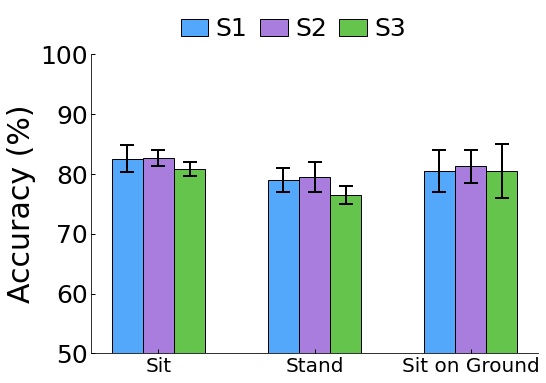

In [19]:
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2']

fig, ax = plt.subplots(figsize=(8, 5.5))
ind = np.arange(1, len(p_s1_mean)+1)
# np.arange(1,len(sit+1))*0.9  # the x locations for the groups
width = 0.2
rects1 = ax.bar(ind - width, p_s1_mean, width,edgecolor = 'black',color=colors[0],
                label='S1',  yerr=p_s1_std,
                error_kw=dict(elinewidth=2,markeredgewidth=2,capsize=7))
rects3 = ax.bar(ind , p_s2_mean, width, edgecolor = 'black',
                label='S2', color = colors[1],  yerr=p_s2_std,
                error_kw=dict(elinewidth=2,markeredgewidth=2,capsize=7))
rects2 = ax.bar(ind + width, p_s3_mean, width, edgecolor = 'black',
                label='S3',color = colors[2],  yerr=p_s3_std,
                error_kw=dict(elinewidth=2,markeredgewidth=2,capsize=7))


ax.set_ylabel("Accuracy (%)",fontsize=30)
ax.set_xticks(ind)
ax.set_xticklabels(p_list,fontsize=30)


ax.legend(loc="upper left", prop={'size': 25,},ncol=3,bbox_to_anchor=(0.15, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
# ax.legend(loc="upper center", prop={'size': 20,},ncol=3,bbox_to_anchor=(0.5, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1 ,handletextpad = 0.2)

ax.set_ylim(50, 100)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=20, length=4, direction='in', width=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/4.Robustness/Fig18.svg',format='svg', bbox_inches="tight")

### Motion

In [20]:
m_list = ['Gaming', 'Typing', 'Leg shaking']

M1_0 = np.asarray([0.76, 0.86, 0.86])
M1_1 = np.asarray([0.84, 0.86, 0.81])
M1_2 = np.asarray([0.79, 0.77, 0.89])

M2_0 = np.asarray([0.84, 0.82, 0.89])
M2_1 = np.asarray([0.86, 0.77, 0.80])
M2_2 = np.asarray([0.86, 0.89, 0.81])

M3_0 = np.asarray([0.79, 0.83, 0.79])
M3_1 = np.asarray([0.74, 0.82, 0.79])
M3_2 = np.asarray([0.80, 0.86, 0.79])


s1 = np.asarray([M1_0, M2_0, M3_0]) * 100
s1_mean = s1.mean(axis=1)
s1_std = s1.std(axis=1)

s2 = np.asarray([M1_1, M2_1, M3_1]) * 100
s2_mean = s2.mean(axis=1)
s2_std = s2.std(axis=1)

s3 = np.asarray([M1_2, M2_2, M3_2]) * 100
s3_mean = s3.mean(axis=1)
s3_std = s3.std(axis=1)


In [21]:
print(s1_std)
print(s2_std)
print(s3_std)

[4.71404521 2.94392029 1.88561808]
[2.05480467 3.74165739 3.29983165]
[5.24933858 3.29983165 3.09120617]


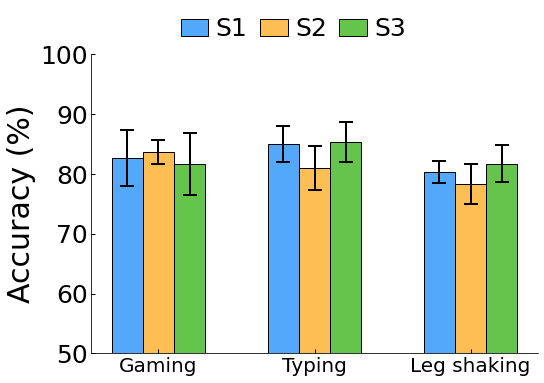

In [22]:
colors = ['#53a8fb', '#a97ddd', '#64c44b', '#68dcf2', '#FFBE54']

fig, ax = plt.subplots(figsize=(8, 5.5))
ind = np.arange(1, len(s1_mean)+1)
# np.arange(1,len(sit+1))*0.9  # the x locations for the groups
width = 0.2
rects1 = ax.bar(ind - width, s1_mean, width,edgecolor = 'black',color=colors[0],
                label='S1',  yerr=s1_std,
                error_kw=dict(elinewidth=2,markeredgewidth=2,capsize=7))
rects3 = ax.bar(ind , s2_mean, width, edgecolor = 'black',
                label='S2', color = colors[-1],  yerr=s2_std,
                error_kw=dict(elinewidth=2,markeredgewidth=2,capsize=7))
rects2 = ax.bar(ind + width, s3_mean, width, edgecolor = 'black',
                label='S3',color = colors[2],  yerr=s3_std,
                error_kw=dict(elinewidth=2,markeredgewidth=2,capsize=7))


ax.set_ylabel("Accuracy (%)",fontsize=30)
ax.set_xticks(ind)
ax.set_xticklabels(m_list,fontsize=30)


ax.legend(loc="upper left", prop={'size': 25,},ncol=3,bbox_to_anchor=(0.15, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1,handletextpad = 0.3,columnspacing=0.5,handlelength = 1.1)
# ax.legend(loc="upper center", prop={'size': 20,},ncol=3,bbox_to_anchor=(0.5, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1 ,handletextpad = 0.2)

ax.set_ylim(50, 100)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=20, length=4, direction='in', width=1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/4.Robustness/Fig12.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/4.Robustness/Fig12.svg',format='svg', bbox_inches="tight")

### Distance

In [23]:
d30 = np.asarray([0.83571429, 0.89285714, 0.91428571, 0.89857143, 0.84285714,
                 0.81428571, 0.82285714, 0.83857143, 0.82857143, 0.93]) * 100
d30_mean = np.mean(d30)
d30_std = np.std(d30)

d70 = np.asarray([0.89, 0.8095]) * 100
d70_mean = np.mean(d70)
d70_std = np.std(d70)

d100 = np.asarray([84.76, 80.27, 89.00])
d100_mean = np.mean(d100)
d100_std = np.std(d100)

d150 = np.asarray([0.88, 0.7619]) * 100
d150_mean = np.mean(d150)
d150_std = np.std(d150)

d200 = np.asarray([0.72, 0.7814]) * 100
d200_mean = np.mean(d200)
d200_std = np.std(d200)

d250 = np.asarray([0.7286,0.68]) * 100
d250_mean = np.mean(d250)
d250_std = np.std(d250)

d300 = np.asarray([0.67, 0.62]) * 100
d300_mean = np.mean(d300)
d300_std = np.std(d300)

d_mean =[d30_mean, d70_mean, d100_mean, d150_mean, d200_mean, d250_mean, d300_mean]
d_std =[d30_std, d70_std, d100_std, d150_std, d200_std, d250_std, d300_std]


In [21]:
d_std

[4.022411683331799,
 4.024999999999999,
 3.564494665758701,
 5.905000000000001,
 3.0700000000000003,
 2.4299999999999997,
 2.5]

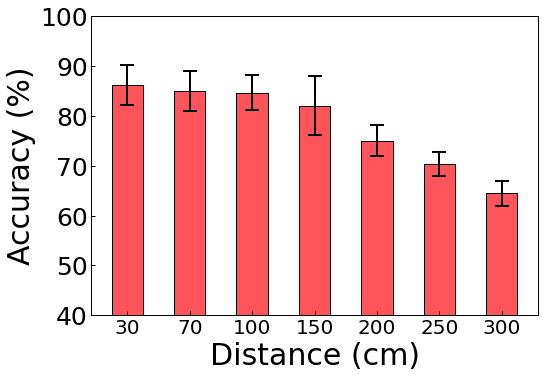

In [24]:
colors = ['#53a8fb', '#a97ddd', '#53a8fb', '#64c44b', '#68dcf2', '#FF545A']
# colors1 = ['#c2342c',#ef8636]
# d_list = ['30cm', '70cm', '100cm', '150cm', '200cm', '250cm', '300cm']
d_list = ['30', '70', '100', '150', '200', '250', '300']

fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))
ind = np.arange(len(d_mean))  # the x locations for the groups
width = 0.5  # the width of the bars
rects1 = ax.bar(ind, d_mean, width, edgecolor='black', color=colors[-1],
                label='Accuracy', linewidth=1, yerr=d_std,
                error_kw=dict(elinewidth=2, markeredgewidth=2, capsize=7))

ax.set_ylabel("Accuracy (%)", fontsize=30)
ax.set_xlabel("Distance (cm)", fontsize=30)

ax.set_xticks(ind)
font_dict = {'fontsize': 25, 'verticalalignment': 'top'}
ax.set_xticklabels(d_list, fontsize=25,
                   rotation_mode='anchor', position=(0, 0))
ax.set_ylim(40, 100)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=20, length=4, direction='in', width=1)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)

# fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/4.Robustness/Fig10.pdf',format='pdf', bbox_inches="tight")
fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/4.Robustness/Fig10.svg',format='svg', bbox_inches="tight")


### Wearing

In [25]:
W1_1 = [1.00, 0.75, 1.00, 0.50, 1.00, 0.50, 0.25]
W1_2 = [1.00, 0.83, 1.00, 0.67, 1.00, 0.75, 0.50]
W1_3 = [1.00, 0.91, 1.00, 0.82, 1.00, 0.89, 0.73]

W2_1 = [1.00, 1.00, 1.00, 1.00, 0.83, 1.00, 0.62]
W2_2 = [1.00, 1.00, 1.00, 1.00, 0.75, 1.00, 0.50]
W2_3 = [1.00, 1.00, 1.00, 1.00, 0.91, 1.00, 0.77]

W3_1 = [1.00, 0.80, 1.00, 0.57, 1.00, 1.00, 1.00]
W3_2 = [1.00, 0.67, 1.00, 0.40, 1.00, 1.00, 1.00]
W3_3 = [1.00, 0.90, 1.00, 0.75, 1.00, 1.00, 1.00]


In [26]:
W0_mean =[87.0, 86.1, 89.1, 88.3, 87.8, 83.9, 83.0]
W0_std = [3.03795436,5.76206464, 4.72948787, 3.39226965, 3.70281334, 5.8214164,
 7.98479458]

W1 = [[0.78, 0.75, 0.85, 0.75, 0.80, 0.75, 0.75],
      [0.82, 0.83, 0.80, 0.79, 0.85, 0.85, 0.70],
      [0.80, 0.85, 0.82, 0.82, 0.80, 0.89, 0.73]]
w1_mean = np.mean(np.asarray(W1) * 100, axis=0)
w1_std = np.std(np.asarray(W1) * 100, axis=0)

W2 = [[0.81, 0.85, 0.85, 0.80, 0.83, 0.82, 0.82],
      [0.78, 0.80, 0.80, 0.82, 0.75, 0.80, 0.75],
      [0.83, 0.83, 0.86, 0.84, 0.91, 0.80, 0.77]]

w2_mean = np.mean(np.asarray(W2) * 100, axis=0)
w2_std = np.std(np.asarray(W2) * 100, axis=0)


W3 = [[0.87, 0.80, 0.90, 0.77, 0.87, 0.83, 0.80],
      [0.85, 0.75, 0.85, 0.90, 0.85, 0.85, 0.82],
      [0.82, 0.90, 0.85, 0.85, 0.85, 0.80, 0.83]]

w3_mean = np.mean(np.asarray(W3) * 100, axis=0)
w3_std = np.std(np.asarray(W3) * 100, axis=0)


In [27]:
print(W0_mean)
print(w1_mean)
print(w2_mean)
print(w3_mean)

[87.0, 86.1, 89.1, 88.3, 87.8, 83.9, 83.0]
[80.         81.         82.33333333 78.66666667 81.66666667 83.
 72.66666667]
[80.66666667 82.66666667 83.66666667 82.         83.         80.66666667
 78.        ]
[84.66666667 81.66666667 86.66666667 84.         85.66666667 82.66666667
 81.66666667]


In [28]:
print(W0_std)
print(w1_std)
print(w2_std)
print(w3_std)

[3.03795436, 5.76206464, 4.72948787, 3.39226965, 3.70281334, 5.8214164, 7.98479458]
[1.63299316 4.3204938  2.05480467 2.86744176 2.3570226  5.88784058
 2.05480467]
[2.05480467 2.05480467 2.62466929 1.63299316 6.53197265 0.94280904
 2.94392029]
[2.05480467 6.23609564 2.3570226  5.35412613 0.94280904 2.05480467
 1.24721913]


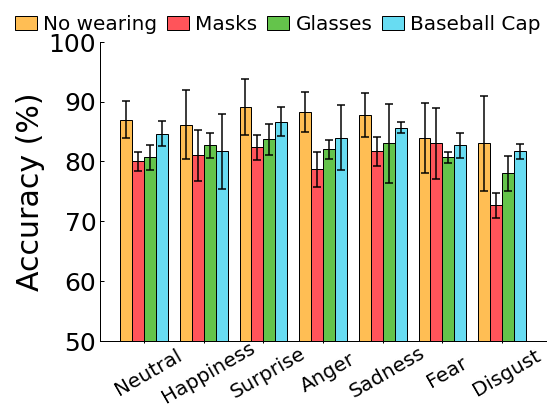

In [30]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))
colors =['#53a8fb', '#a97ddd', '#64c44b','#68dcf2', '#FF545A', '#FFBE54']
# colors1 = ['#c2342c',#ef8636]
emotion_list = ['Neutral', 'Happiness', 'Surprise','Anger', 'Sadness', 'Fear', 'Disgust']

ind = np.arange(1, len(w1_mean)+1)
# np.arange(1,len(sit+1))*0.9  # the x locations for the groups
width = 0.2  # the width of the bars

rects0 = ax.bar(ind - 3/2*width, W0_mean, width, edgecolor = 'black',color=colors[-1],
                label='No wearing',linewidth=1, yerr=W0_std,
                error_kw=dict(elinewidth=1.5,markeredgewidth=1.5,capsize=4))
rects1 = ax.bar(ind - width/2, w1_mean, width, edgecolor='black', color=colors[-2],
                label='Masks', yerr=w1_std, error_kw=dict(elinewidth=1.5, markeredgewidth=1.5, capsize=4))
rects3 = ax.bar(ind + width/2, w2_mean, width, edgecolor='black', label='Glasses', color=colors[2],
                yerr=w2_std, error_kw=dict(elinewidth=1.5, markeredgewidth=1.5, capsize=4))
rects2 = ax.bar(ind + 3/2*width, w3_mean, width, edgecolor='black', label='Baseball Cap', color=colors[3],
                yerr=w3_std, error_kw=dict(elinewidth=1.5, markeredgewidth=1.5, capsize=4))



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel("Accuracy (%)", fontsize=30)
# ax.set_xlabel("# Devices",fontsize=30)
# ax.set_title('battery variance',fontsize=18,fontweight="bold")
ax.set_ylim(50, 100)
ax.yaxis.set_tick_params(labelsize=25, length=5)
ax.set_xticks(ind)
ax.set_xticklabels(emotion_list, fontsize=25, rotation=30,
                   rotation_mode='anchor', position=(0, -0.06))

ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

ax.legend(loc="upper left", prop={'size': 20, }, ncol=4, bbox_to_anchor=(-0.23, 1.15), fancybox=True,
          framealpha=0.0, labelspacing=0.1, handletextpad=0.3, columnspacing=0.5, handlelength=1.1)
# ax.legend(loc="upper center", prop={'size': 20,},ncol=3,bbox_to_anchor=(0.5, 1.2),fancybox=True, framealpha=0.0,labelspacing=0.1 ,handletextpad = 0.2)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.yaxis.set_tick_params(labelsize=25, length=4, direction='in', width=1)
ax.xaxis.set_tick_params(labelsize=20, length=2, direction='out', width=1)

# plt.tight_layout()

fig.savefig('C:/Users/Zber/Desktop/mmEmo_Exp/4.Robustness/Fig13.svg',format='svg', bbox_inches="tight")


In [ ]:
# sub_folder = 'C:/Users/Zber/Desktop/Subjects_Heatmap'
# sub_files = ['heatmap_test_S0_1_2.txt', 
#              'heatmap_test_S0_1_2.txt',
#              'heatmap_test_S0_1_2.txt', 'heatmap_test_S3_4_5.txt',
#              'heatmap_test_S3_4_5.txt', 'heatmap_test_S6_7_8_9.txt',
#              'heatmap_test_S6_7_8_9_v1.txt']


# res_folder = 'C:/Users/Zber/Documents/Dev_program/OpenRadar/FER/results'
# W1_path = ['Evaluate_oldData_ours_W1_v1_20220604-231908',
#         'Evaluate_oldData_ours_W1_v2_20220604-232232',
#         'Evaluate_oldData_ours_W1_v3_20220604-225433']

# W2_path = ['Evaluate_oldData_ours_W2_v1_20220604-231931',
#         'Evaluate_oldData_ours_W2_v2_20220604-232315',
#         'Evaluate_oldData_ours_W2_v3_20220604-232531']

# W3_path = ['Evaluate_oldData_ours_W3_v1_20220604-231953',
#         'Evaluate_oldData_ours_W3_v2_20220604-232345',
#         'Evaluate_oldData_ours_W3_v3_20220604-232555']

# subs = []
# emos = []
# ps = []
# ls = []

# for p, sub_file in zip(path, sub_files):
#     res_path = os.path.join(res_folder, p)
#     p, l = load_res(res_path)
#     s, e = load_sub(os.path.join(sub_folder, sub_file))
#     ps += p
#     ls += l
#     subs += s
#     emos += e